In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [28]:
pip install dtreeviz

In [29]:
import dtreeviz

In [30]:
training_data = pd.read_csv("/content/UNSW_NB15_training-set.csv")
testing_data= pd.read_csv("/content/UNSW_NB15_testing-set.csv")
print("training ",training_data.shape)
print("testing ",testing_data.shape)

training  (82332, 45)
testing  (175341, 45)


In [31]:
data= pd.concat([training_data,testing_data]).drop('id',axis=1)
data = data.reset_index(drop=True)
#data= pd.concat([training_data]).drop('id',axis=1)
#data = data.reset_index(drop=True)

In [32]:
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [33]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [34]:
data.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [36]:
for col in ['proto', 'service', 'state']:
    data[col] = data[col].astype('category').cat.codes

data['attack_cat'] = data['attack_cat'].astype('category')

attack_cat
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: count, dtype: int64


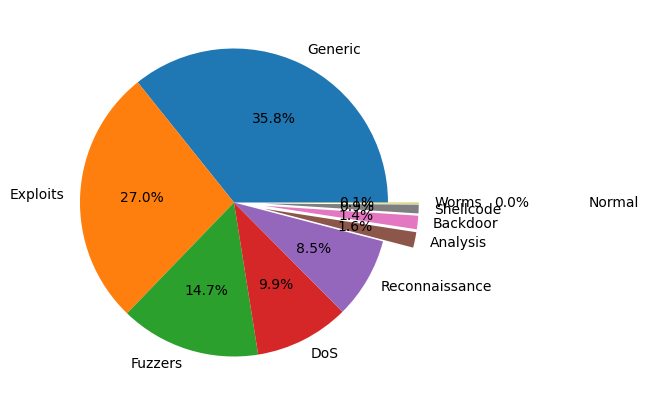

In [37]:
validAttacks = data[data['label']==1]['attack_cat'].value_counts()
print(validAttacks)
plt.figure(figsize = (5,5))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

attack_cat
Normal            93000
Analysis              0
Backdoor              0
DoS                   0
Fuzzers               0
Exploits              0
Generic               0
Reconnaissance        0
Shellcode             0
Worms                 0
Name: count, dtype: int64


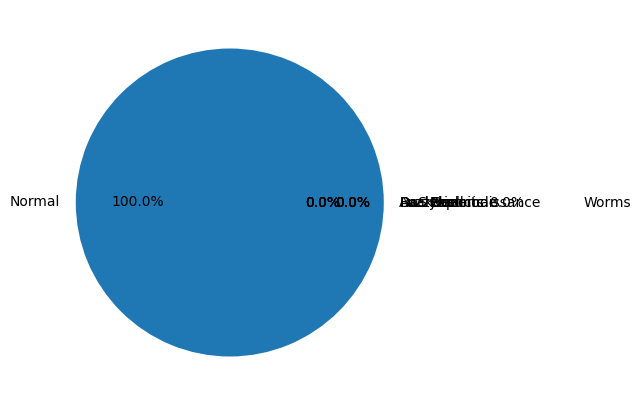

In [38]:
validAttacks = data[data['label']==0]['attack_cat'].value_counts()
print(validAttacks)
plt.figure(figsize = (5,5))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

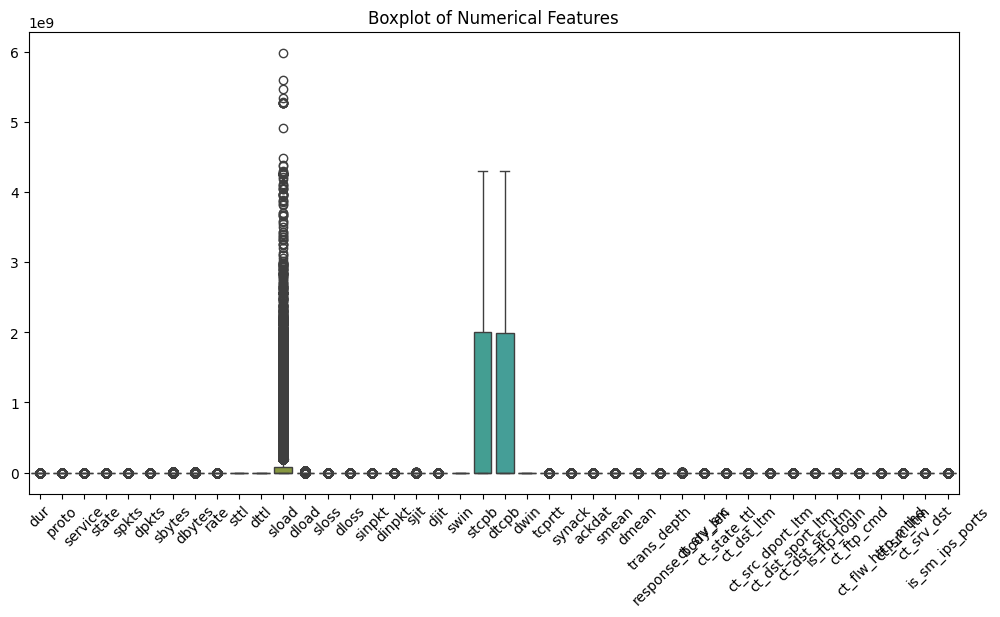

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(['label'], axis=1))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

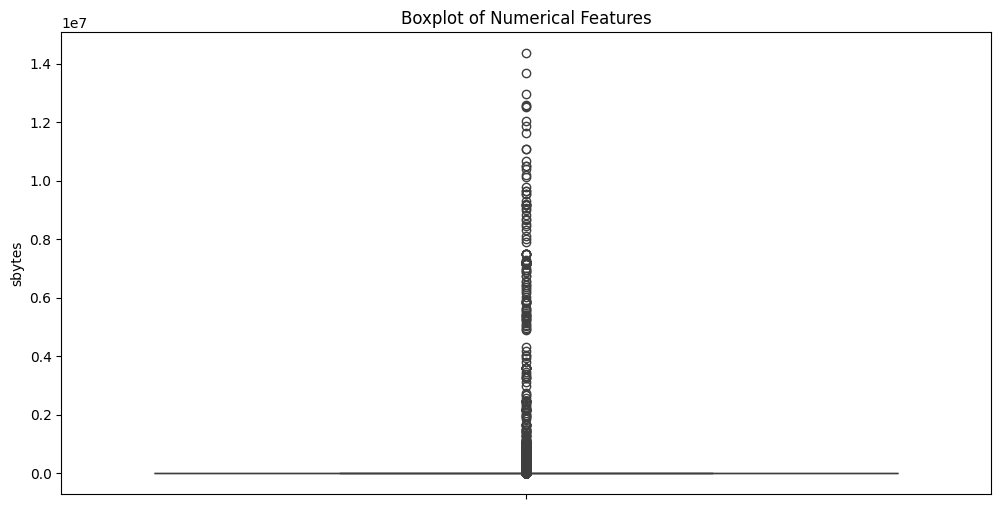

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["sbytes"])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

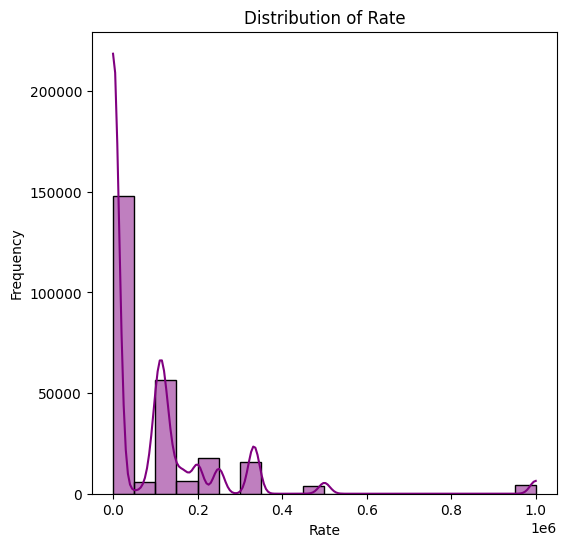

In [41]:
plt.figure(figsize=(6, 6))
sns.histplot(data['rate'], bins=20, kde=True, color='purple')
plt.title('Distribution of Rate')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

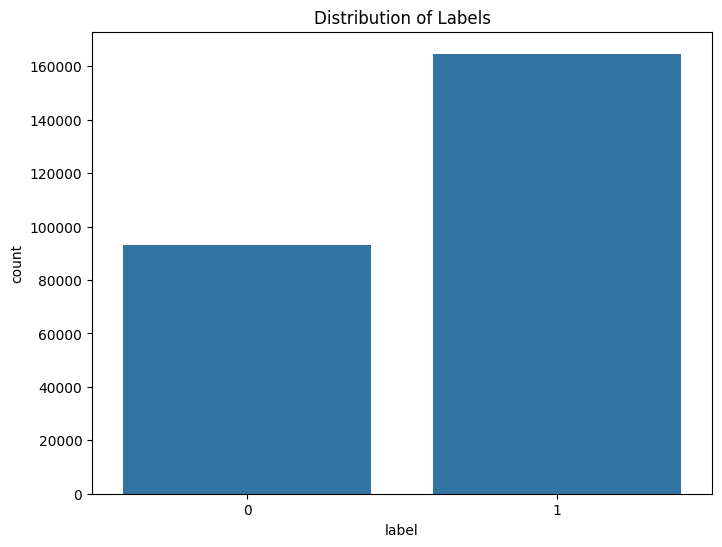

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label')
plt.title('Distribution of Labels')
plt.show()

In [43]:
X = data.drop(columns = ['attack_cat', 'label'])
y = data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [44]:
X = data.drop(columns = ['attack_cat', 'label'])
Y = data['label'].values

In [45]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [46]:
X_test = X_test.reset_index(drop=True)

rules= "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

ind = X_test.query(rules).index

X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data" , (1- np.round(X_test_2.shape[0] / X_test.shape[0],2))*100, "%")

(77302, 42)
(59425, 42)
filtered data 23.0 %


In [47]:
def model_evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test_2)

    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)

    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
    plt.show()
    return {'Recall' : recall}

In [48]:
results = {}

Recall:  0.9571815389589395
Precision:  0.9647257693326001
Accuracy:  0.9351956247370635


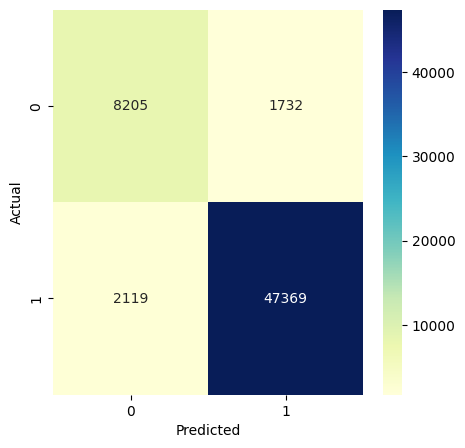

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=11)
results['Random Forest Model'] = model_evaluation(rf)

Recall:  0.9517458777885548
Precision:  0.9657774405872583
Accuracy:  0.931729070256626


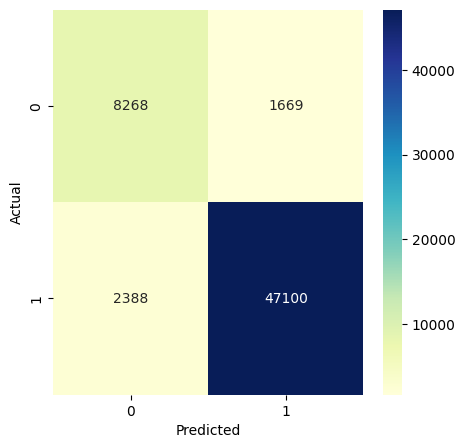

In [50]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
results['XGBoost Classifier'] = model_evaluation(xgbc)

Recall:  0.9490179437439379
Precision:  0.9507662408648299
Accuracy:  0.9166175851914178


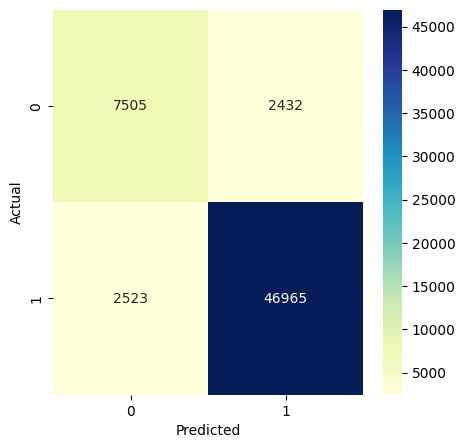

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=11)
results['Decision Tree Model'] = model_evaluation(dt)